In [23]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import warnings         
warnings.filterwarnings("ignore")


In [24]:
dfe = pd.read_csv("dataset/resampled-train.csv")

In [25]:

X_resampled = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]

y_resampled = dfe['Price_Category']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


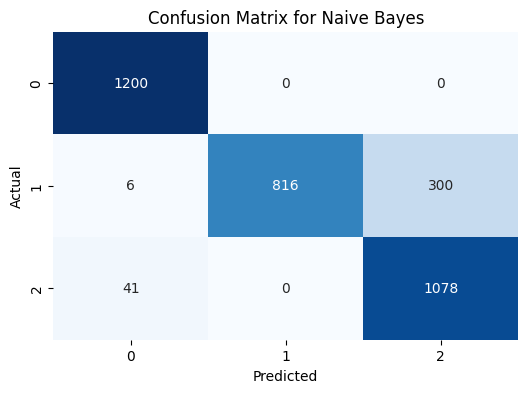

Accuracy: 0.8991572217378669
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1200
           1       1.00      0.73      0.84      1122
           2       0.78      0.96      0.86      1119

    accuracy                           0.90      3441
   macro avg       0.91      0.90      0.90      3441
weighted avg       0.92      0.90      0.90      3441



In [27]:
param_grid = {'priors': [None, [0.1, 0.9], [0.3, 0.7], [0.5, 0.5], [0.7, 0.3], [0.9, 0.1]]}

nb_classifier = GaussianNB()

grid_search_nb = GridSearchCV(nb_classifier, param_grid, cv=5)
grid_search_nb.fit(X_train_scaled, y_train)

best_nb = grid_search_nb.best_estimator_

y_pred_best_nb = best_nb.predict(X_test_scaled)

conf_matrix_best_nb = confusion_matrix(y_test, y_pred_best_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_nb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


accuracy = accuracy_score(y_test, y_pred_best_nb)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred_best_nb)
print(report)


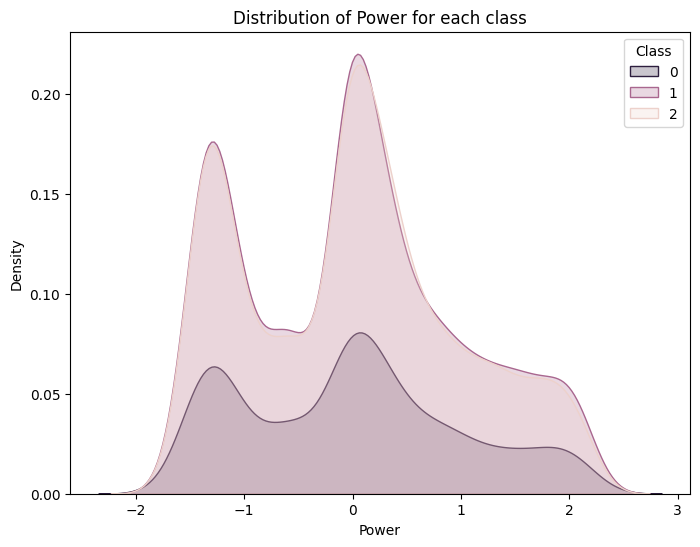

In [28]:
feature_names = ['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats','Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic','Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above','Owner_Second', 'Owner_Third']
df = pd.DataFrame(X_train_scaled, columns=feature_names)
df['Label'] = y_train  

visualize = 'Power'

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x=visualize, hue='Label', fill=True)
plt.title(f'Distribution of {visualize} for each class')
plt.xlabel(visualize)
plt.legend(title='Class', labels='012')
plt.show()
